In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline 
import os 
path='LogiReg_data.txt'
pdData=pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted']) 
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
pdData.shape

(100, 3)

In [4]:
positive=pdData[pdData['Admitted']==1]
negative=pdData[pdData['Admitted']==0]
positive.head()

,Exam 1,Exam 2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


In [5]:
negative.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0


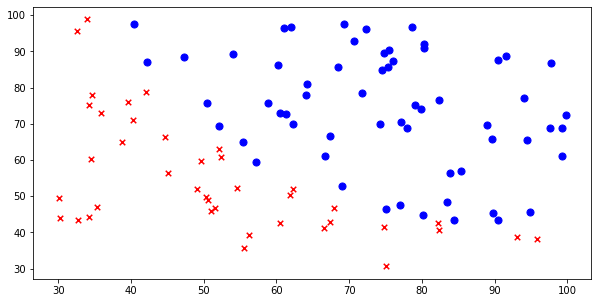

In [6]:
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=30,c='r',marker='x',label='Not Admitted')

In [7]:
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

Text(3.200000000000003, 0.5, 'Exam 2 Score')

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

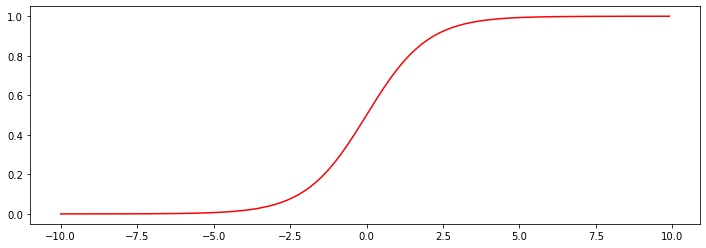

In [9]:
nums=np.arange(start=-10,stop=10,step=.1)
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(nums,sigmoid(nums),'r')

In [10]:
def model(X,theta):
    return sigmoid(np.dot(X,theta.T))
# pdData.drop('Ones',axis=1)
pdData.insert(0,'Ones',1)

In [11]:
pdData.head()
# orig_data=pdData.as_matrix() 
orig_data=pdData.values
cols=orig_data.shape[1]
X=orig_data[:,0:cols-1]
y=orig_data[:,cols-1:cols]
print(X[:5])
print(y[:5])
theta=np.zeros([1,3])
theta

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


array([[0., 0., 0.]])

In [12]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

In [13]:
def cost(X,y,theta):
    left=np.multiply(-y,np.log(model(X,theta)))
    right=np.multiply((1-y),np.log(1-model(X,theta)))
    return np.sum((left-right)/len(X))
cost(X,y,theta)

0.6931471805599457

###  计算梯度 

In [18]:
def grandient(X,y,theta):
    grad=np.zeros(theta.shape)
    error=(model(X,theta)-y).ravel()
    for j in range(len(theta.ravel())):
        term=np.multiply(error,X[:,j])
        grad[0,j]=np.num(term)/len(X)
    return grad

def grandient(X,y,theta):
    grad=np.zeros(theta.shape)
    error=(model(X,theta)-y).ravel()
    for j in range(len(theta.ravel())):
        term=np.multiply(error,X[:j])
        grad[0,j]=np.sum(term)/len(X)
    return grad

### Gradient descent 
比较3中不同梯度下降方法 

In [ ]:
STOP_ITER=0
STOP_COST=1
STOP_GRAD=2
def stopGriterion(type,value,threshold):
    # 设置三种不同的停止策略 
    if type==STOP_ITER:return value>threshold
    elif type==STOP_COST:return abs(value[-1]-value[-2])<threshold
    elif type==STOP_GRAD:return np.linalg.norm(value)<threshold
        
        

